# Python Crash Course - Episode 2

Preliminaries: importing modules.

In Python, you use the `import` keyword to make code in one module available in another. You may want to import your own code, for example a library of functions you want to access (without re-defining everything), or a class (an object-contructor script). This is really helpful for organizing your code.

You can also import modules and packages available online (after download and installation).
Each module/package has online documentation explaining the usage of each function/class.
 Here some examples:


*   [math module](https://docs.python.org/3/library/math.html)
*   [numpy module](https://numpy.org/doc/stable/index.html)


In [3]:
# This module provides access to the mathematical functions defined by the C standard.
import math

p = math.pi
math.sin(0.5*p)



1.0

In [4]:
# you can also give the module you import a nickname
import math as m
m.sin(0.5*m.pi)


1.0

In [5]:
# if you know you are going to use specific constants/functions from a module, you can decide to import those and nothing else
from math import pi,sin

sin(0.5*pi)

1.0

Preliminaries: matrices as lists of lists.

Write a function, `symmetryCheck`, that takes as input a matrix, expressed as a list of lists, and determines whether or not the matrix is symmetric. The function should return the strings `not symmetric` or `symmetric`. You may not use any obvious builtin function.

In [7]:
# hints on accessing elements
l1 = [i for i in range(5)]
l2 = [2*i for i in range(3)]

lols = [l1,l2]

print(lols)
lols[1][0:2]


[[0, 1, 2, 3, 4], [0, 2, 4]]


[0, 2]

In [8]:
def symmetryCheck(A):
    # your code here
    c = len(A)
    r = len(A[0])
    if r!=c:
      return 'not symmetric'
    for row in range(r):
      column = [A[col][row] for col in range(c)]
      if (A[row][:] != column):
        return 'not symmetric'
    return 'symmetric'


In [9]:
# test case 1
A = [[1, 2, 3], [2, 1, 3]]
assert(symmetryCheck(A) == 'not symmetric')
print('Test case passed!')

Test case passed!


In [10]:
# test case 2
A = [[1, 2, 3], [2, 1, 3], [2, 1, 3]]
assert(symmetryCheck(A) == 'not symmetric')
print('Test case passed!')

Test case passed!


In [11]:
# test case 3
A = [[1, 2, 3], [2, 1, 3], [3, 3, 3]]
assert(symmetryCheck(A) == 'symmetric')
print('Test case passed!')

Test case passed!


## NumPy - the fundamental package for scientific computing in Python

It is a Python library that provides a multidimensional array object, various derived objects (such as matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more.

[ref. [Numpy documentation](https://numpy.org/doc/stable/index.html)]

In [12]:
import numpy as np

The object around which the package is built is the `np.array`, a data structure that differs from lists by the following
* While a Python list can contain different data types within a single list, all of the elements in a NumPy array should be homogeneous.
* NumPy arrays are faster and more compact than Python lists. An array consumes less memory and is convenient to use.
* The indexing and element access is similar to the one in Matlab.

An array is a grid of values and it contains information about the raw data, how to locate an element, and how to interpret an element. Key attributes:

* The elements are all of the same type, referred to as the array dtype.
* The rank of the array is the number of dimensions `ndim`.
* The shape of the array is a tuple of integers giving the size of the array along each dimension.

In [13]:
b = np.array([1.,2,3])

print(b)
print()
print(["type:  ", b.dtype])
print(["rank:  ", b.ndim])
print(["shape: ", b.shape])

[1. 2. 3.]

['type:  ', dtype('float64')]
['rank:  ', 1]
['shape: ', (3,)]


In [14]:
A = np.array(A)
print(A)
print()
print(["type:  ", A.dtype])
print(["rank:  ", A.ndim])
print(["shape: ", A.shape])

[[1 2 3]
 [2 1 3]
 [3 3 3]]

['type:  ', dtype('int64')]
['rank:  ', 2]
['shape: ', (3, 3)]


Besides creating an array from a sequence of elements, you can easily create an array filled with 0’s or 1's. Or filled with a range of elements or even linearly spaces numbers in an interval.

In [20]:
np.zeros(shape=(4,1),dtype=int)

array([[0],
       [0],
       [0],
       [0]])

In [21]:
np.ones(shape=(4,),dtype=float)

array([1., 1., 1., 1.])

In [23]:
# the arange function
a = -3 # start
b = 10 # stop
c = 2 # step
np.arange(a,b,c)

array([-3, -1,  1,  3,  5,  7,  9])

In [24]:
# the linspace function
a = -3 # start
b = 10 # stop
c = 5 # number of elements
np.linspace(a,b,c)

array([-3.  ,  0.25,  3.5 ,  6.75, 10.  ])

Indexing and slicing of NumPy arrays:

In [26]:
A = np.random.randint(-10,10,(5,3)) # low, high, shape
#print(A)
A[:,1:3]

array([[ 5,  9],
       [-3, -8],
       [-1,  3],
       [-2, -7],
       [-2, -8]])

Exercise: rewrite the function SymmetryCheck code using arrays instead of lists.

In [27]:
a = np.array([1,2,3])
b = np.array([2,2,2])
print(a==b)

[False  True False]


In [28]:
def symmetryCheck_arrays(A):
    # your code here
    r,c = A.shape
    if r!=c:
      return 'not symmetric'
    for row in range(r):
      if any(A[row,:] != A[:,row]):
        return 'not symmetric'
    return 'symmetric'


In [29]:
# test cases
b = np.random.randint(-100, 100, size = (10, 10))
test = (b + b.T)
test1 = (symmetryCheck_arrays(test) == 'symmetric')
b = np.random.randint(-100, 100, size = (10, 10))
test2 = (symmetryCheck_arrays(b) == 'not symmetric')

if test1 and test2:
  print('Test cases passed!!!')
else:
  print('Oh no :(')

Test cases passed!!!


One of the disclaimers with which we started talking about Numpy arrays was an efficiency boost, let's check!

In [31]:
import time
# using lists
b = np.random.randint(-100, 100, size = (1000, 1000))
b1 = (b + b.T).tolist()
b2 = np.random.randint(-100, 100, size = (1000, 1000)).tolist()

start_time = time.time()

test1 = (symmetryCheck(b1) == 'symmetric')
test2 = (symmetryCheck(b2) == 'not symmetric')

end_time_lists = time.time() - start_time


# using arrays
b = np.random.randint(-100, 100, size = (1000, 1000))
b1 = (b + b.T)
b2 = np.random.randint(-100, 100, size = (1000, 1000))

start_time = time.time()
test1 = (symmetryCheck_arrays(b1) == 'symmetric')
test2 = (symmetryCheck_arrays(b2) == 'not symmetric')

end_time_arrays = time.time() - start_time

print("The execution time for symmetryCheck is ", end_time_lists)
print("The execution time for symmetryCheck_arrays is ", end_time_arrays)

The execution time for symmetryCheck is  0.1256265640258789
The execution time for symmetryCheck_arrays is  0.026897430419921875


## Some other useful functions

1.   Using `np.array.reshape()` will give a new shape to an array without changing the data. Just remember that when you use the reshape method, the array you want to produce needs to have the same number of elements as the original array (use the attribute `size` to check!).
2.   You can add, and sort elements of an array by using the functions `np.concatenate((a,b),axis=0)` and `np.sort(a)`



In [43]:
a = np.arange(6)
b = np.arange(10,15,3)
print(a)
print(b)
c = np.concatenate((b,a))
print(c)

c.sort()
print(c)

c.reshape((4,2))



[0 1 2 3 4 5]
[10 13]
[10 13  0  1  2  3  4  5]
[ 0  1  2  3  4  5 10 13]


array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [10, 13]])

## Exercises

1. Looking at the official Numpy documentation, write a function `my_linear_solver` for computing the solution of linear systems $Ax=b$ as $x=A^{-1}b$.
2. Confront the solution with `np.linalg.solve()`. Which method is faster?


In [45]:
def my_linear_solver(A,b):
  # your code here
  Am1 = np.linalg.inv(A)
  x = np.matmul(Am1,b)
  return x


In [48]:
A = np.random.randint(-10,10,(1000,1000))
b = np.random.randint(-10,10,(1000,1))

#your code here
start_time = time.time()
my_solution = my_linear_solver(A,b)
my_time = time.time() - start_time

start_time = time.time()
inbuilt_solution = np.linalg.solve(A,b)
linalg_time = time.time() - start_time

print("The execution time for my code is ", my_time)
print("The execution time for np.linalg.solve() ", linalg_time)


The execution time for my code is  0.19468164443969727
The execution time for np.linalg.solve()  0.06889081001281738


In [49]:
def Newton_system(F, J, x, tol, max_iteration):
    # your code here
    F_x = F(x)
    J_x = J(x)
    update = np.linalg.solve(J_x,F_x)
    n_iteration = 1

    while np.linalg.norm(update, ord=2)>tol and n_iteration<max_iteration:
      x = x - update
      n_iteration += 1
      update = np.linalg.solve(J(x),F(x))

    if n_iteration >= max_iteration:
      print('Newton did not converge')
      return None
    else:
      return x

3. write a function Newton_system that takes the input defined below and returns the solution of a non-linear system of equations.

4. test the function on the following system
$$\begin{cases}
x+y+z=3\\
x^2 + y^2 + z^2 = 5\\
e^x + xy+xz = 1
\end{cases}
$$
and starting from the initial guess $[cos(2),14,3]$. The solution should be close to $[0,2,1]$.

In [50]:
def F(s):
  # your code here
  x,y,z = s[0],s[1],s[2]
  f1 = x+y+z-3
  f2 = x**2 + y**2 + z**2 - 5
  f3 = m.e**x + x*y + x*z - 1

  return np.array([f1,f2,f3])

def J(s):
  # your code here
  x,y,z = s[0],s[1],s[2]
  df1 = [1,1,1]
  df2 = [2*x,2*y,2*z]
  df3 = [m.e**x+y+z,x,x]
  return np.array([df1,df2,df3])

In [52]:
x0 = np.array([m.cos(2),14,3])
Newton_system(F, J, x0, 1e-10, 1e3)

array([-4.09755936e-18,  2.00000000e+00,  1.00000000e+00])

## Matplotlib - plotting the results
For the official documentation visit the [Matplotlib website](https://matplotlib.org/stable/).

Matplotlib graphs your data on Figures, each of which can contain one or more Axes, an area where points can be specified in terms of their coordinates. The simplest way of creating a Figure with an Axes is using `pyplot.subplots`.


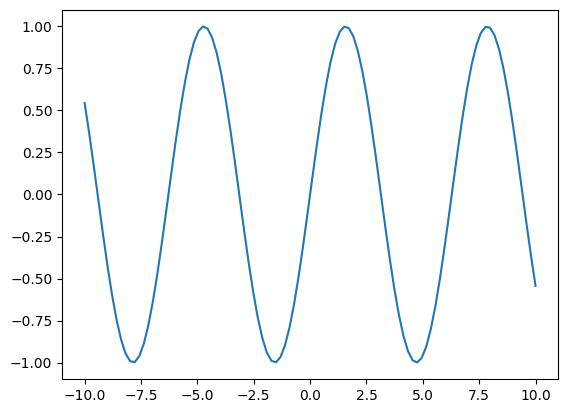

In [53]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()  # Create a figure containing a single axes.

x = np.linspace(-10,10,100) # x coordinates
y = np.sin(x)  # y coordinates
ax.plot(x, y)  # Plot some data on the axes.

An Axes is an object attached to a Figure that contains a region for plotting data, and usually includes two (or three in the case of 3D) Axis objects that provide ticks and tick labels to provide scales for the data in the Axes.

Each Axes also has a title (set via `set_title()`), an x-label (set via `set_xlabel()`), and a y-label set via `set_ylabel()`). We usually plot on Axes (as done in the previous example).



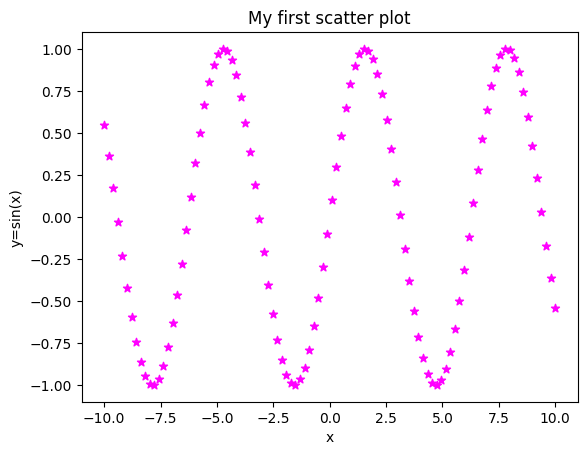

In [55]:
fig2, ax = plt.subplots()       # a figure with a single Axes
ax.set_title('My first scatter plot')
ax.set_xlabel('x')
ax.set_ylabel('y=sin(x)')
ax.scatter(x,y,marker='*',c='magenta')


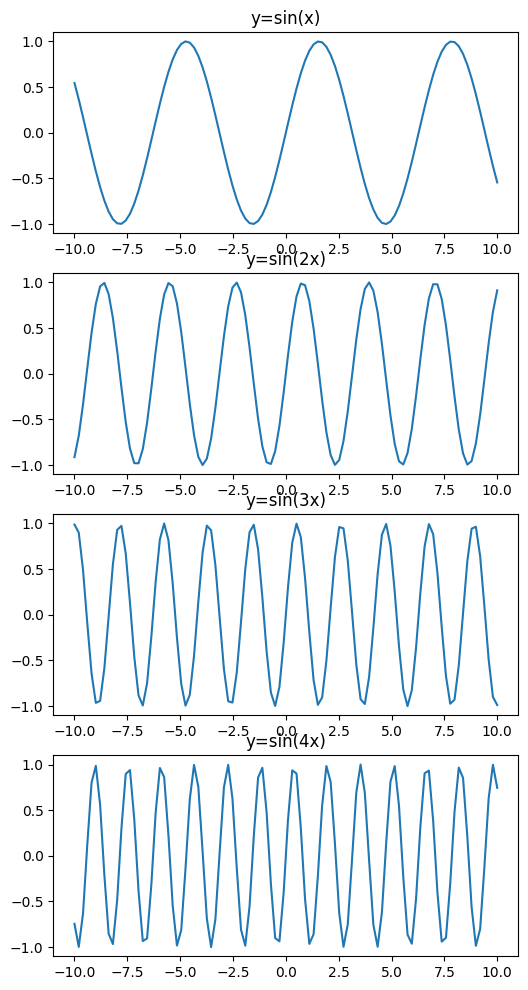

In [59]:
fig3, axs = plt.subplots(4, 1, figsize=(6, 12))  # a figure with a 1x4 grid of Axes
titles = ['y=sin(x)','y=sin(2x)','y=sin(3x)','y=sin(4x)']

for i in range(axs.size):
  axs[i].set_title(titles[i])
  y = np.sin(x*(i+1))
  axs[i].plot(x,y)

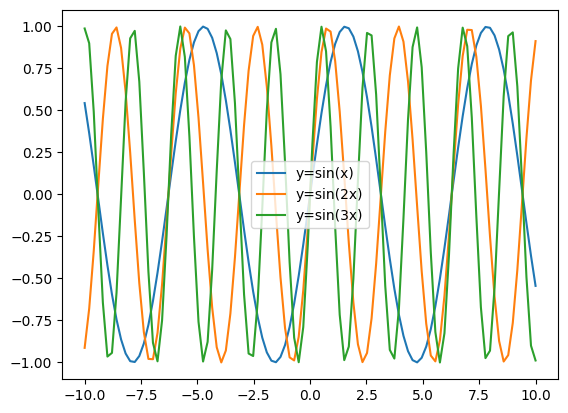

In [61]:
# we can also plot multiple times over the same Axes
fig3, ax = plt.subplots()
titles = ['y=sin(x)','y=sin(2x)','y=sin(3x)']

for i in range(len(titles)):
  y = np.sin((i+1)*x)
  ax.plot(x,y,label=titles[i])

ax.legend()


## Exercise

1. Implement Forward Euler method for the equation
$$y' - y = -\dfrac{1}{2} e^{t/2}sin(5t)+5e^{t/2}cos(5t),\qquad y(0)=0$$
and plot the evolution of the $y$ in the time interval $[0,1]$ with time step $dt=0.01$.
2. Compare the approximation with the analytic solution
$$y(t) = e^{t/2}sin(5t)$$

In [65]:
def forward_Euler(f,y0,t0,tf,dt):
  # your code here
  state = [y0]
  nt = int((tf-t0)/dt)
  for t in range(nt-1):
    next_state = y0 + dt*f(y0,t*dt)
    state.append(next_state)
    y0 = next_state
  return state

In [ ]:
def f(y,t):
  return -0.5*m.e**(t/2)*m.sin(5*t)+5*m.e**(t/2)*m.cos(5*t) + y

Text(0, 0.5, 'y')

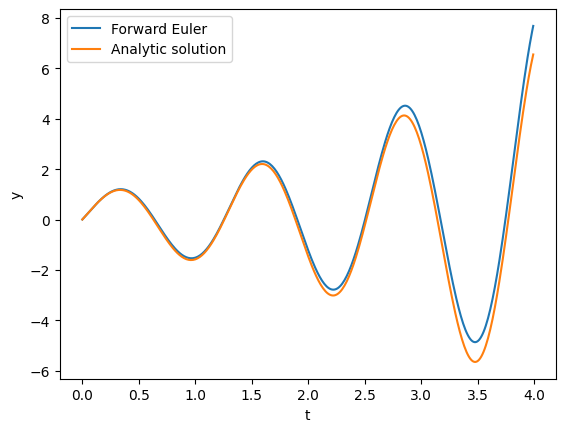

In [70]:
# your code here
f = lambda y,t: -0.5*m.e**(t/2)*m.sin(5*t)+5*m.e**(t/2)*m.cos(5*t) + y
f_analytic = lambda t: np.e**(t/2)*np.sin(5*t)



y0 = 0
t0,tf,dt = 0,4,0.01
evolution = forward_Euler(f,y0,t0,tf,dt)

fig,ax= plt.subplots()
time = np.arange(t0,tf,dt)

ax.plot(time,evolution,label='Forward Euler')

evolution_analytic = f_analytic(time)
ax.plot(time,evolution_analytic,label='Analytic solution')

ax.legend()
ax.set_xlabel('t')
ax.set_ylabel('y')



## Open exercise

Implement the Backward Euler method for the equation in the previous exercise, keeping the same time step. Use the Newton method implemented before to solve the implicit step. Plot the approximation vs. the analytic solution.